In [48]:
%matplotlib inline

import numpy as np
import csv

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [12]:
file_name = 'ionosphere.data.txt'

In [13]:
X, y = [], []

In [14]:
with open(file_name, 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        X.append([float(datum) 
                  for datum in row[:-1]])
        # Good sample 'g'?
        y.append(row[-1] == 'g')
X, y = np.array(X), np.array(y)

In [16]:
X.shape, y.shape

((351, 34), (351,))

In [19]:
X[0]

array([ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306,
        0.83398, -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,
        0.59755, -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,
        0.58212, -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,
        0.56811, -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,
        0.42267, -0.54487,  0.18641, -0.453  ])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [27]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
y_pred = clf.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%'

'Accuracy: 86.36%'

In [40]:
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
f'Mean accuracy: {np.mean(scores)*100:.2f}%'

'Mean accuracy: 82.62%'

In [42]:
avg_scores = []
all_scores = []

parameter_values = list(range(1, 21)) # Include 20.

for n_neighbors in parameter_values:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

Text(0.5, 1.0, 'Number of neighbors vs Mean Accuracy')

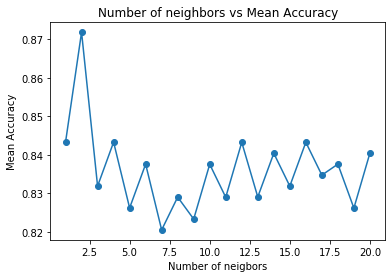

In [46]:
plt.plot(parameter_values, avg_scores, '-o')
plt.xlabel('Number of neigbors')
plt.ylabel('Mean Accuracy')
plt.title('Number of neighbors vs Mean Accuracy')

In [53]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', KNeighborsClassifier())
])
scores = cross_val_score(pipeline, X_test, y_test, scoring='accuracy', cv=5)
f'Mean accuracy: {np.mean(scores)*100:.2f}%'

'Mean accuracy: 82.05%'